<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/Isotipo-Negro.gif" title="Title text" width="20%" height="20%" />


<hr style="height:2px;border:none"/>
<h1 align='center'> INF-393 Máquinas de Aprendizaje II-2019 </h1>

<H3 align='center'> Tarea 0 - Introducción a Máquinas de Aprendizaje </H3>
<hr style="height:2px;border:none"/>

**Temas**  
* Introducción a librerías comunes de *Machine Learning*:
    * Pandas
    * Numpy
    * Sklearn
    * Matplotlib
    * Otro..
* Implementación de Perceptrón y variantes.
* Implementación de método aprendizaje online (Gradiente descendente).
 

** Formalidades **  
* Equipos de trabajo de: 2 personas
* Se debe preparar un (breve) Jupyter/IPython notebook que explique la actividad realizada y las conclusiones del trabajo
* Fecha de entrega: 6 de Septiembre.
* Formato de entrega: envı́o de link Github al correo electrónico del ayudante (*<francisco.mena.13@sansano.usm.cl>*) , incluyendo al profesor en copia (*<jnancu@inf.utfsm.cl>*). Por favor especificar el siguiente asunto: [Tarea0-INF393-II-2019]

<hr style="height:2px;border:none"/>

La tarea se divide en secciones:

[1.](#primero) Perceptrón a mano

<hr style="height:2px;border:none"/>

<a id="primero"></a>
## 1. Perceptrón a mano

<img src="https://miro.medium.com/max/1838/1*n6sJ4yZQzwKL9wnF5wnVNg.png" width="40%"  />

En esta sección se le pedirá que implemente el algoritmo online del *perceptrón* [[2]](#refs) para aprender una función de separación lineal en un problema de clasificación binaria (0 o 1) a través de la función de *treshold*. Un algoritmo online, como el caso del *perceptrón*, aprende de una instancia de dato a la vez $(x^{(i)},y^{(i)})$, dentro de un conjunto de datos $\{(x^{(1)},y^{(1)}), (x^{(2)},y^{(2)}), \ldots, (x^{(N)},y^{(N)})  \}$, donde la predicción de la clase para cada instancia es través de la función de *treshold*:

$$
\hat{y_i} = f(x^{(i)};w,b) = \left\{ \begin{array}{lc}
       1 &  si \ \sum_j w_j \cdot x^{(i)}_j +b \geq \theta \\
       0 &  si \ \sum_j w_j \cdot x^{(i)}_j +b < \theta
     \end{array} \right.
$$


Donde $\theta = 0$. Recordar que el *bias* $b$ se puede incluir dentro de los pesos/parámetros $w$ si se agrega una columna extra de 1's a los datos de entrada $x$ (*como se ve en la imagen anterior*). 

Para lo que sigue de la actividad sólo podrá utilizar *numpy* (para operaciones de algebra lineal).

In [50]:
from time import time
import numpy as np

> a) Escriba una función que calcule el valor de salida (*output*) del modelo $f(x)$ para un patrón de entrada $x$ a través de los pesos $w$ del modelo. *Decida si incluir los bias dentro de $w$ o manejarlos de manera separada*.

In [2]:
def f(xi, w):
    if(np.dot(w, xi) >= 0):
        return 1
    return 0

> b) Escriba una función que implemente el clásico algoritmo del **Perceptrón** para un problema binario que permita entrenarlo en un conjunto de datos de tamaño $N$, leídos de manera *online* (uno a uno). *Recordar la decisión anterior sobre los bias*.



In [58]:
def perceptron(x, y, n, N):
    init_time = time()
    w = np.zeros(x[0].size)
    acc_arr = []
    mistakes = True
    
    while(mistakes):
        mistakes = False
        correct = 0
        
        for i in range(N):            
            if y[i] != f(x[i], w):
                
                #Como en la definición del algoritmo los valores de y son 0 y 1, se debe hacer un ajuste
                if(y[i] == 0):
                    y_i = -1
                else:
                    y_i = 1
                
                w = (w + n * y_i * x[i]).T
                mistakes = True 
                
            else:
                correct += 1 
            
            acc_arr.append(correct/(i+1))
            
        break  
    end_time = time()
    print("Tiempo:", end_time - init_time, "[s]")
    return acc_arr

> c) Demuestre que lo implementado funciona en un problema real de clasificación. Para esto utilice el dataset **Breast cancer wisconsin**, disponible a través de la librería __[*sklearn*](http://scikit-learn.org)__, el cual corresponde a la detección de cancer mamario a través de características relevantes (numéricas continuas) de un examen realizado, como por ejemplo la textura, simetría y tamaño de una masa mamaria. Estas características deben combinarse linealmente para la detección del cancer.
> <div class="alert alert-block alert-info">Es una buena práctica el normalizar los datos antes de trabajar con el modelo</div>
```python
from sklearn.datasets import load_breast_cancer
X_train,y_train = load_breast_cancer(return_X_y=True)
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_train = np.c_[X_train, np.ones(N) ] #add columns of 1's if you want
```
Para evaluar los resultados mida la exactitud (*accuracy*) de la clasificación durante el entrenamiento (por cada iteración/instancia/dato) y grafique, utilice el conjunto de entrenamiento realizando una sola pasada (el objetivo de esta sección es familiarizarse con el algoritmo). Además reporte el tiempo de entrenamiento mediante el algoritmo implementado.

In [75]:
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler

X_train,y_train = load_breast_cancer(return_X_y=True) 
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_train = np.c_[X_train, np.ones(len(X_train)) ] #add columns of 1's if you want

#TODO: Usar solo el 70% de los datos y no el 100%. El otro 30% es para test.

asd = perceptron(X_train, y_train, 0.3, len(X_train))
#train = train(X_train, y_train, 0.5, len(X_train))

Tiempo: 0.0009953975677490234 [s]


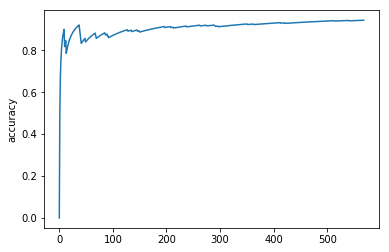

In [76]:
import matplotlib.pyplot as plt
plt.plot(asd)
plt.ylabel('accuracy')
plt.show()

> d) Escriba una función que implemente el **Forgetrón** [[3]](#refs) con una memoria de tamaño $K$ y la función de kernel como el producto interno (*inner-product*), esto es $<a,b> = \sum_i a_i \cdot b_i$.

In [ ]:
#https://papers.nips.cc/paper/2806-the-forgetron-a-kernel-based-perceptron-on-a-fixed-budget.pdf
def F(x, X, w, K):
    result = 0
    
    for i in range(K):
        result += w[i] * np.inner(X[i], x)
        
    return result

> e) Vuelva a realizar el item c) para el **Forgetrón** con un $K=10$ y compare los resultados.

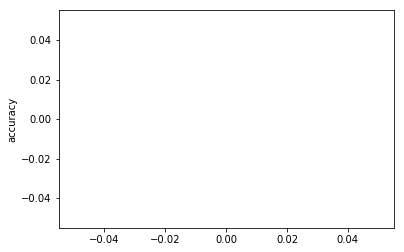

In [78]:
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler

X_train,y_train = load_breast_cancer(return_X_y=True) 
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_train = np.c_[X_train, np.ones(len(X_train)) ] #add columns of 1's if you want

#TODO: Usar solo el 70% de los datos y no el 100%. El otro 30% es para test.

def forgetron(x, y, n, N):
    init_time = time()
    w = np.zeros(x[0].size)
    acc_arr = []
    mistakes = True
    
    while(mistakes):
        mistakes = False
        correct = 0
        
        for i in range(N):            
            if y[i] != f(x[i], w):
                
                #Como en la definición del algoritmo los valores de y son 0 y 1, se debe hacer un ajuste
                if(y[i] == 0):
                    y_i = -1
                else:
                    y_i = 1
                
                w = (w + n * y_i * x[i]).T
                mistakes = True 
                
            else:
                correct += 1 
            
            acc_arr.append(correct/(i+1))
            
        break  
    end_time = time()
    print("Tiempo:", end_time - init_time, "[s]")
    return acc_arr

import matplotlib.pyplot as plt
plt.plot(accs)
plt.ylabel('accuracy')
plt.show()

### ¿Qué sucede al variar la función objetivo del problema? 
Si utilizáramos la función de pérdida *binary cross entropy*, que castiga de manera suave los valores en que se equivoca el modelo a través de que el valor de salida sea una confiabilidad $g(x; w,b) \in [0,1]$.
$$
\ell (y, \ g(x;w,b)) = - y \cdot \log{(g(x;w,b))} - (1-y) \cdot \log{(1-g(x;w,b))}
$$

Realice una modificación al perceptrón para que entregue como salida una confiabilidad continua entre 0 y 1. Una buena aproximación de la función *treshold* (con $\theta=0$) del perceptrón es la función sigmoidal.

<img src="https://i.imgur.com/lr6F3Ur.png" width="60%"  />

Ésto sería modelar el perceptrón como:
$$
g(x^{(i)};w,b) = p(y=1|x^{(i)}) = \sigma \left( \sum_j w_j \cdot x^{(i)}_j +b \right)
$$

Con $\sigma$ la función sigmoidal de la forma $\sigma(\xi) = 1/(1+e^{-\xi}) $, la cual tiene una derivada cíclica que hace más fácil el cálculo: $\sigma'(\xi) = \sigma(\xi) (1-\sigma(\xi))$

> f) Escriba una función que compute la función sigmoidal para una entrada $\xi$ cualquiera. *Tenga cuidado con los límites de números que puede trabajar python (por ejemplo $\exp{800}\rightarrow +\infty$)*. *Se aconseja acotar/truncar los valores que entran a la función para que la operación se pueda realizar*. Además escriba una función que calcule la salida del nuevo modelo $g(x; w,b)$ con esta función sigmoidal.

In [79]:
#No sé si falta agregar los límites de número, no sé como hacerlo o numpy los ignora.
def sigmoidal(xi):
    return 1/(1 + np.exp(-1 * xi))

def g(x_i, w):
    return sigmoidal(np.dot(w, x_i))

> g) Escriba una función que calcule la función de pérdida descrita anteriormente para un dato $x^{(i)}$, utilizando $g(x^{(i)};w,b)$. *Tenga cuidado con los límites del logaritmo (recordad que $\log{0}\rightarrow +\infty$)*.

In [80]:
#No sé si falta agregar los límites de número, no sé como hacerlo o numpy los ignora.
#Creo que se deben considerar todos los logs bajo 1 como 0 (recuerdo que algo así dijo el profe en clase)
#onda que el log de 0 era 0
def ell(y, x_i, w):
    g_xw = g(x_i, w)
   
    if(g_xw == 1):
        g_xw = 0.9

    return -y * np.log(g_xw) - (1 - y) * np.log(1 - g_xw)

> h) Escriba una función que calcule el gradiente (derivada) de la función de pérdida anterior con respecto a los pesos del modelo $w$. *Se recomienda derivarla analíticamente y luego escribirla*. *Recuerde el uso de la regla de la cadena*.

Para efectos de este entrenamiento, la función de pérdida está definida como:

$$
\ell(y, \sigma(\xi)) = -y\ln(\sigma(\xi)) - (1-y)\ln(1-\sigma(\xi))
$$

donde el bias está incluido en los pesos y $\xi$ se define como:

$$
\xi = \sum_j w_j \cdot x^{(i)}_j
$$

Calcular el gradiente de la Binary Cross Entropy implica derivar multiples veces con respecto a los pesos del modelo $w$. Para un peso particular $w_{l}$, se pueden calcular las siguientes derivadas:

$$
\frac{\partial \xi}{\partial w_{l}} = \frac{\partial \sum_j w_j \cdot x^{(i)}_j}{\partial w_{l}} = x_{l}^{(i)}
$$

$$
\frac{\partial \sigma(\xi)}{\partial w_{l}} = \sigma(\xi)(1-\sigma(\xi))*\frac{\partial \xi}{\partial w_{l}} = \sigma(\xi)(1-\sigma(\xi))*x_{l}^{(i)}
$$

$$
\frac{\partial \ln(\sigma(\xi))}{\partial w_{l}} = \frac{1}{\sigma(\xi)}*\frac{\partial \sigma(\xi)}{\partial w_{l}} = \frac{1}{\sigma(\xi)} * \sigma(\xi)(1-\sigma(\xi))*x_{l}^{(i)} = (1-\sigma(\xi))*x_{l}^{(i)}
$$


Luego, la derivada de la función de pérdida para un peso $w_{l}$ es:

$$
\frac{\partial \ell(y^{(i)}, \sigma(\xi))}{\partial w_{l}} = \sigma(\xi)(1-\sigma(\xi))*x_{l}^{(i)} * (\frac{-y^{(i)}}{\sigma(\xi)} + \frac{(1-y^{(i)})}{(1-\sigma(\xi))})
$$

Finalmente, el gradiente de la Binary Cross Entropy es el conjunto de las derivadas respecto a todos los pesos.

In [74]:
#Me arriesgo a decir que esto esta listo
def gradient(x_i, w, y):
    #Se reserva espacio para almacenar el gradiente
    result = np.zeros(len(w))
    
    #Calculo de derivadas según cada peso
    for i in range(len(w)):
        ga = g(x_i, w)
        result[i] = ga * (1 - ga) * ((-y/ga) + ((1 - y)/(1 - ga)))
    
    #Se retorna el conjunto de derivadas o gradiente
    return result

> i) Realice una modificación al algoritmo implementado en b) (**Perceptrón**) para que se adapte a la función objetivo *binary cross entropy* implementada, para ésto haga uso del algoritmo de optimización SGD [[4]](#refs) (*Stochastic Gradient Descend*) con tasa de aprendizaje $\eta \in [0,1]$.

$$ \vec{w}^{(t+1)} \leftarrow \vec{w}^{(t)} - \eta \cdot \nabla_{\vec{w}^{(t)}} \ell $$

In [72]:
#Esto igual debiese estar listo; pero por ahora retorna solo pérdida y no accuracy.
def train_sgd(x, y, n, N):
    w = np.zeros(x[0].size)
    mistakes = True
    perd = []
    
    while(mistakes):
        mistakes = False

        for i in range(N):
            l = ell(y[i], x[i], w)
            
            #NOTA: En el algoritmo original, el optimo se encuenta cuando no hay error. Sin embargo, para calcular accuracy
            #quizás esto se debiese cambiar por if l != y.
            if l > 0:
                w = (w.T - (n * gradient(x[i], w, y[i]))).T
                mistakes = True
                
            perd.append(l)
            
        #Comentar break para ejecutar el entrenamiento completo
        break 
    
    return perd

> j) Vuelva a realizar el item c) con esta modificación, además grafique la función de pérdida en el transcurso del entrenamiento. Compare los resultados.

C:\Users\sebaa\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


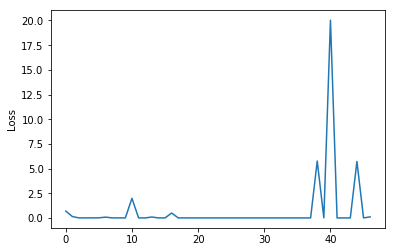

In [83]:
from sklearn.datasets import load_breast_cancer 
from sklearn.preprocessing import StandardScaler

X_train,y_train = load_breast_cancer(return_X_y=True) 
scaler = StandardScaler().fit(X_train) 
X_train = scaler.transform(X_train) 
X_train = np.c_[X_train, np.ones(len(X_train)) ] #add columns of 1's if you want

a = train_sgd(X_train, y_train, 0.5, len(X_train))

import matplotlib.pyplot as plt
plt.plot(a)
plt.ylabel('Loss')
plt.show()

<a id="refs"></a>
### Referencias
[1] Hastie, T.; Tibshirani, R., Friedman, J. (2009), *The Elements of Statistical Learning*, Second Edition.
Springer New York Inc.  
[2] STEPHEN, I. (1990). *Perceptron-based learning algorithms*. IEEE Transactions on neural networks, 50(2), 179.  
[3] Dekel, O., Shalev-Shwartz, S., & Singer, Y. (2006). *The Forgetron: A kernel-based perceptron on a fixed budget*. In Advances in neural information processing systems (pp. 259-266).  
[4] Ruder, S. (2016). *An overview of gradient descent optimization algorithms*. arXiv preprint arXiv:1609.04747.  